In [9]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import rasterstats
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Read the sub-districts of Bangkok Metropolis shapefile 
districts = gpd.read_file(r'D:\Back up\BKK\Bankok_Subdistricts_Boundary.shp')

In [11]:
# Read the NO2 raster of before pandemic
no2 = rasterio.open(r'D:\Projects\Ajarn Noppol\005_COVID Project\COVID Thailand\Abstract\Version_2\During_BKK_V2_Clip.tif', mode = 'r')


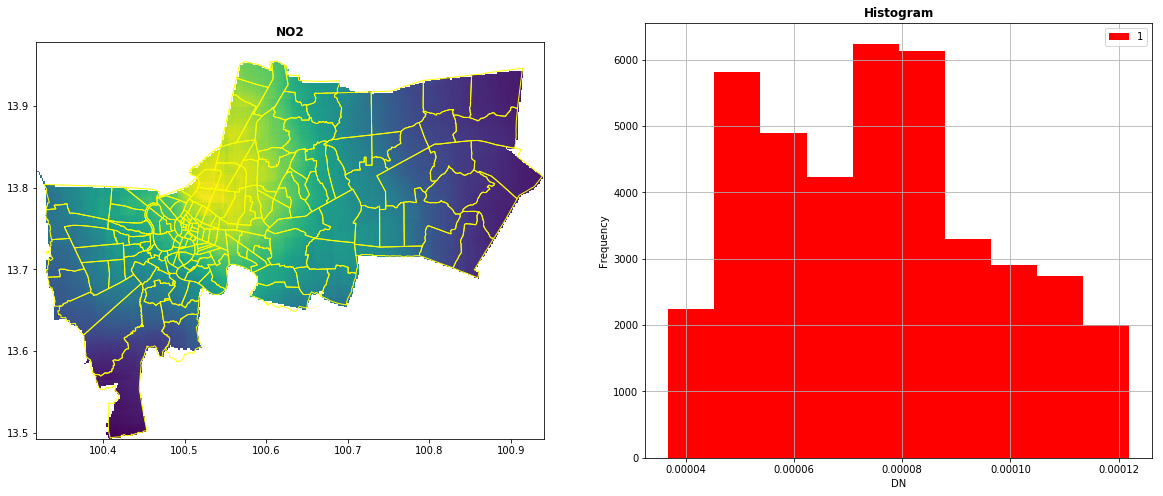

In [12]:
# Plotting the raster and the sub-districts shapefile together 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
show(no2, ax = ax1, title = 'NO2')
districts.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
show_hist(no2, title = 'Histogram', ax = ax2)
plt.show()

In [13]:
# Assign raster values to a numpy nd array
nitrogendioxide_array = no2.read(1)

affine = no2.transform

In [14]:
# Calculating the zonal statistics 
avg_no2  = rasterstats.zonal_stats(districts, nitrogendioxide_array, affine = affine,
                                      stats = ['mean'], 
                                      geojson_out = True)

C:\ProgramData\Anaconda3\lib\site-packages\rasterstats\io.py:300: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [15]:
# Extracting the average NO2 data from the list
avg_nitrogendioxide = []
i = 0

while i < len(avg_no2):
    avg_nitrogendioxide.append(avg_no2[i]['properties'])
    i = i + 1

In [16]:
# Transfering the infromation from the list to a pandas DataFrame

avg_no2_bkk_subdis_during = pd.DataFrame(avg_nitrogendioxide)
print(avg_no2_bkk_subdis_during)

      ADM0_EN ADM0_PCODE                      ADM0_TH  ADM1_EN ADM1_PCODE  \
0    Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
1    Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
2    Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
3    Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
4    Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
..        ...        ...                          ...      ...        ...   
164  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
165  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
166  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
167  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   
168  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Bangkok       TH10   

                                     ADM1_TH               ADM2_EN ADM2_PCO

In [32]:
avg_no2_bkk_subdis_during.to_csv('BKK_MeanNO2_Subdistrict_During_V2.csv', encoding='utf-8')